## Ramon Brand - Session 5 - Cifar 100 with Convolution Base from Cifar 10
### Overview
The idea of this exercise is to train a neural network using the Cifar-100 dataset, using the base from the Cifar-10 model we made earlier.

In [16]:
import numpy as np
from keras.preprocessing.image import load_img
import matplotlib.pyplot as plt
import mnist_reader
from keras.datasets import cifar100
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.layers import Conv2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import MaxPooling2D

# -- Load images, pre-shuffled
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

# -- Change type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# -- Normalize
x_train /= 255
x_test /= 255

# -- Drop data with category more than 3
train_drop_indexes = []
for i in reversed(range(len(y_train))):
    if(y_train[i] > 3):
        train_drop_indexes.append(i)
        
        
x_train = np.delete(x_train, train_drop_indexes, axis=0)
y_train = np.delete(y_train, train_drop_indexes)

y_train = np.reshape(y_train, (len(y_train), 1))

test_drop_indexes = []
for i in reversed(range(len(y_test))):
    if(y_test[i] > 3):
        test_drop_indexes.append(i)
        
x_test = np.delete(x_test, test_drop_indexes, axis=0)
y_test = np.delete(y_test, test_drop_indexes)

y_test = np.reshape(y_test, (len(y_test), 1))

# -- Change results to category one hot
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)


# -- Extract some validation data from our training data
VALIDATION_SAMPLES = 400

x_val = x_train[len(x_train) - VALIDATION_SAMPLES:]
x_train = x_train[:len(x_train) - VALIDATION_SAMPLES]
y_val = y_train[len(y_train) - VALIDATION_SAMPLES:]
y_train = y_train[:len(y_train) - VALIDATION_SAMPLES]

print("Training shape:   ", x_train.shape)
print("Validation shape: ", x_val.shape)
print("Test shape:       ", x_test.shape)
print("Test result shape:", y_test.shape)

# -- Create model
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3), activation="relu", input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu"))
model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(Conv2D(96, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(100, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(100, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(100, activation="softmax"))

model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

hist = model.fit(x_train, y_train, epochs=150, batch_size=32, validation_data=(x_val,y_val))

score = model.evaluate(x_test, y_test)
print("Loss: ", score[0])
print("Accuracy: ", score[1])


Training shape:    (1600, 32, 32, 3)
Validation shape:  (400, 32, 32, 3)
Test shape:        (400, 32, 32, 3)
Test result shape: (400, 100)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 30, 30, 16)        448       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 13, 13, 32)        4640      
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 9, 9, 96)          55392     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 4, 4, 96)          0         
___

1600/1600 [==============================] - 1s 358us/step - loss: 0.8127 - acc: 0.7013 - val_loss: 0.8490 - val_acc: 0.6750
Epoch 46/150
1600/1600 [==============================] - 1s 355us/step - loss: 0.8151 - acc: 0.7013 - val_loss: 0.8331 - val_acc: 0.6725
Epoch 47/150
1600/1600 [==============================] - 1s 381us/step - loss: 0.8007 - acc: 0.6956 - val_loss: 0.7747 - val_acc: 0.7075
Epoch 48/150
1600/1600 [==============================] - 1s 373us/step - loss: 0.7885 - acc: 0.6994 - val_loss: 0.7920 - val_acc: 0.7075
Epoch 49/150
1600/1600 [==============================] - 1s 374us/step - loss: 0.7849 - acc: 0.7031 - val_loss: 0.8489 - val_acc: 0.6825
Epoch 50/150
1600/1600 [==============================] - 1s 371us/step - loss: 0.7646 - acc: 0.7156 - val_loss: 0.9882 - val_acc: 0.6525
Epoch 51/150
1600/1600 [==============================] - 1s 357us/step - loss: 0.7691 - acc: 0.7094 - val_loss: 0.9090 - val_acc: 0.6675
Epoch 52/150
1600/1600 [=======================

1600/1600 [==============================] - 1s 369us/step - loss: 0.3940 - acc: 0.8431 - val_loss: 0.7069 - val_acc: 0.7575
Epoch 105/150
1600/1600 [==============================] - 1s 370us/step - loss: 0.4028 - acc: 0.8556 - val_loss: 0.7075 - val_acc: 0.7525
Epoch 106/150
1600/1600 [==============================] - 1s 372us/step - loss: 0.3997 - acc: 0.8550 - val_loss: 0.7694 - val_acc: 0.7525
Epoch 107/150
1600/1600 [==============================] - 1s 369us/step - loss: 0.3556 - acc: 0.8688 - val_loss: 0.6924 - val_acc: 0.7825
Epoch 108/150
1600/1600 [==============================] - 1s 382us/step - loss: 0.3784 - acc: 0.8625 - val_loss: 0.7579 - val_acc: 0.7500
Epoch 109/150
1600/1600 [==============================] - 1s 383us/step - loss: 0.4068 - acc: 0.8512 - val_loss: 0.6923 - val_acc: 0.7625
Epoch 110/150
1600/1600 [==============================] - 1s 409us/step - loss: 0.3474 - acc: 0.8706 - val_loss: 0.7152 - val_acc: 0.7875
Epoch 111/150
1600/1600 [================

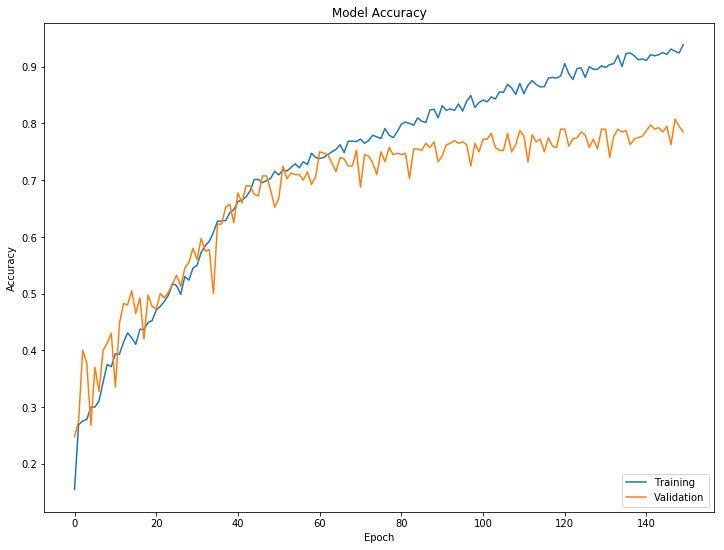

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 9))
plt.plot(hist.history["acc"])
plt.plot(hist.history['val_acc'])
#plt.xlim([5,50])
#plt.ylim([0.75,0.94])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Training", "Validation"], loc="lower right")
plt.show()

Since these models take quite a while to train, I will keep the previous model above, and proceed to making a new model, based on what I now know.

It is very interesting how the model seems to train well until around epoch 60, which is when the model starts to over fit. I will now make a deeper model which also uses 5 categories instead of 3.

In [20]:
import numpy as np
from keras.preprocessing.image import load_img
import matplotlib.pyplot as plt
import mnist_reader
from keras.datasets import cifar100
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.layers import Conv2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import MaxPooling2D

# -- Load images, pre-shuffled
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

# -- Change type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# -- Normalize
x_train /= 255
x_test /= 255

# -- Drop data with category more than 3
train_drop_indexes = []
for i in reversed(range(len(y_train))):
    if(y_train[i] > 5):
        train_drop_indexes.append(i)
        
        
x_train = np.delete(x_train, train_drop_indexes, axis=0)
y_train = np.delete(y_train, train_drop_indexes)

y_train = np.reshape(y_train, (len(y_train), 1))

test_drop_indexes = []
for i in reversed(range(len(y_test))):
    if(y_test[i] > 5):
        test_drop_indexes.append(i)
        
x_test = np.delete(x_test, test_drop_indexes, axis=0)
y_test = np.delete(y_test, test_drop_indexes)

y_test = np.reshape(y_test, (len(y_test), 1))

# -- Change results to category one hot
y_train = to_categorical(y_train, 6)
y_test = to_categorical(y_test, 6)


# -- Extract some validation data from our training data
VALIDATION_SAMPLES = 400

x_val = x_train[len(x_train) - VALIDATION_SAMPLES:]
x_train = x_train[:len(x_train) - VALIDATION_SAMPLES]
y_val = y_train[len(y_train) - VALIDATION_SAMPLES:]
y_train = y_train[:len(y_train) - VALIDATION_SAMPLES]

print("Training shape:   ", x_train.shape)
print("Validation shape: ", x_val.shape)
print("Test shape:       ", x_test.shape)
print("Test result shape:", y_test.shape)

# -- Create model
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3), activation="relu", input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu"))
model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(Conv2D(96, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(400, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(200, activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(100, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(6, activation="softmax"))

model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

hist2 = model.fit(x_train, y_train, epochs=250, batch_size=16, validation_data=(x_val,y_val))

score2 = model.evaluate(x_test, y_test)
print("Loss: ", score2[0])
print("Accuracy: ", score2[1])


Training shape:    (2600, 32, 32, 3)
Validation shape:  (400, 32, 32, 3)
Test shape:        (600, 32, 32, 3)
Test result shape: (600, 6)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 30, 30, 16)        448       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 13, 13, 32)        4640      
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 9, 9, 96)          55392     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 4, 4, 96)          0         
_____

2600/2600 [==============================] - 2s 601us/step - loss: 0.7639 - acc: 0.7027 - val_loss: 0.9977 - val_acc: 0.6350
Epoch 44/250
2600/2600 [==============================] - 2s 613us/step - loss: 0.7508 - acc: 0.7096 - val_loss: 0.9630 - val_acc: 0.6125
Epoch 45/250
2600/2600 [==============================] - 2s 597us/step - loss: 0.7323 - acc: 0.7127 - val_loss: 1.1759 - val_acc: 0.6025
Epoch 46/250
2600/2600 [==============================] - 2s 606us/step - loss: 0.7114 - acc: 0.7123 - val_loss: 0.9265 - val_acc: 0.6475
Epoch 47/250
2600/2600 [==============================] - 2s 607us/step - loss: 0.7131 - acc: 0.7119 - val_loss: 0.9550 - val_acc: 0.6400
Epoch 48/250
2600/2600 [==============================] - 2s 596us/step - loss: 0.6963 - acc: 0.7235 - val_loss: 0.9255 - val_acc: 0.6325
Epoch 49/250
2600/2600 [==============================] - 2s 610us/step - loss: 0.6664 - acc: 0.7385 - val_loss: 1.0566 - val_acc: 0.6225
Epoch 50/250
2600/2600 [=======================

2600/2600 [==============================] - 2s 611us/step - loss: 0.1256 - acc: 0.9538 - val_loss: 1.4638 - val_acc: 0.6925
Epoch 103/250
2600/2600 [==============================] - 2s 608us/step - loss: 0.1565 - acc: 0.9458 - val_loss: 1.4453 - val_acc: 0.6925
Epoch 104/250
2600/2600 [==============================] - 2s 604us/step - loss: 0.1614 - acc: 0.9454 - val_loss: 1.4625 - val_acc: 0.6775
Epoch 105/250
2600/2600 [==============================] - 2s 615us/step - loss: 0.1246 - acc: 0.9600 - val_loss: 2.0374 - val_acc: 0.6375
Epoch 106/250
2600/2600 [==============================] - 2s 603us/step - loss: 0.1445 - acc: 0.9546 - val_loss: 1.3607 - val_acc: 0.6725
Epoch 107/250
2600/2600 [==============================] - 2s 607us/step - loss: 0.1247 - acc: 0.9581 - val_loss: 1.3831 - val_acc: 0.6900
Epoch 108/250
2600/2600 [==============================] - 2s 610us/step - loss: 0.1157 - acc: 0.9627 - val_loss: 1.5568 - val_acc: 0.6875
Epoch 109/250
2600/2600 [================

2600/2600 [==============================] - 2s 598us/step - loss: 0.0540 - acc: 0.9850 - val_loss: 1.8119 - val_acc: 0.6950
Epoch 162/250
2600/2600 [==============================] - 2s 614us/step - loss: 0.0332 - acc: 0.9908 - val_loss: 1.8825 - val_acc: 0.7075
Epoch 163/250
2600/2600 [==============================] - 2s 600us/step - loss: 0.0240 - acc: 0.9923 - val_loss: 1.7287 - val_acc: 0.7000
Epoch 164/250
2600/2600 [==============================] - 2s 600us/step - loss: 0.0336 - acc: 0.9877 - val_loss: 1.7071 - val_acc: 0.7350
Epoch 165/250
2600/2600 [==============================] - 2s 618us/step - loss: 0.0215 - acc: 0.9935 - val_loss: 1.8745 - val_acc: 0.7050
Epoch 166/250
2600/2600 [==============================] - 2s 597us/step - loss: 0.0220 - acc: 0.9927 - val_loss: 1.9261 - val_acc: 0.7150
Epoch 167/250
2600/2600 [==============================] - 2s 613us/step - loss: 0.0251 - acc: 0.9919 - val_loss: 1.8912 - val_acc: 0.6925
Epoch 168/250
2600/2600 [================

2600/2600 [==============================] - 2s 602us/step - loss: 0.0573 - acc: 0.9823 - val_loss: 2.1537 - val_acc: 0.6825
Epoch 221/250
2600/2600 [==============================] - 2s 594us/step - loss: 0.0470 - acc: 0.9858 - val_loss: 1.9839 - val_acc: 0.7025
Epoch 222/250
2600/2600 [==============================] - 2s 606us/step - loss: 0.0399 - acc: 0.9873 - val_loss: 2.1021 - val_acc: 0.6875
Epoch 223/250
2600/2600 [==============================] - 2s 601us/step - loss: 0.0127 - acc: 0.9969 - val_loss: 2.0483 - val_acc: 0.6925
Epoch 224/250
2600/2600 [==============================] - 2s 602us/step - loss: 0.0141 - acc: 0.9962 - val_loss: 2.1268 - val_acc: 0.7025
Epoch 225/250
2600/2600 [==============================] - 2s 611us/step - loss: 0.0512 - acc: 0.9846 - val_loss: 2.0829 - val_acc: 0.7025
Epoch 226/250
2600/2600 [==============================] - 2s 602us/step - loss: 0.0260 - acc: 0.9885 - val_loss: 2.2346 - val_acc: 0.6975
Epoch 227/250
2600/2600 [================

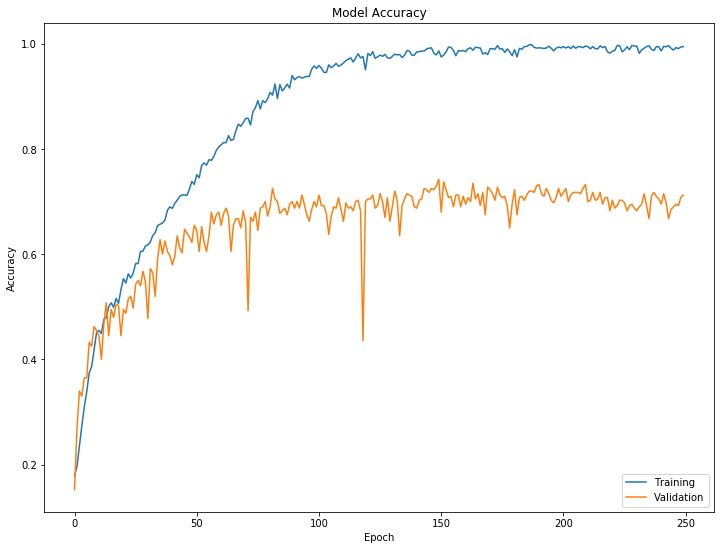

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 9))
plt.plot(hist2.history["acc"])
plt.plot(hist2.history['val_acc'])
#plt.xlim([5,50])
#plt.ylim([0.75,0.94])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Training", "Validation"], loc="lower right")
plt.show()

Overfitting is proving to be a big problem here. I will try another model with regularization layers also, whilst being more aggressive with the dropout layer coefficient.

I was also considering the use of k-fold validation, since my validation set is relitively small, however, the validation accuracy is not that noisy, indicating the validation data isnt the cause of the overfitting spread, but rather the model itself.

In [23]:
import numpy as np
from keras.preprocessing.image import load_img
import matplotlib.pyplot as plt
import mnist_reader
from keras.datasets import cifar100
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.layers import Conv2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import MaxPooling2D
from keras import regularizers

# -- Load images, pre-shuffled
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

# -- Change type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# -- Normalize
x_train /= 255
x_test /= 255

# -- Drop data with category more than 3
train_drop_indexes = []
for i in reversed(range(len(y_train))):
    if(y_train[i] > 5):
        train_drop_indexes.append(i)
        
        
x_train = np.delete(x_train, train_drop_indexes, axis=0)
y_train = np.delete(y_train, train_drop_indexes)

y_train = np.reshape(y_train, (len(y_train), 1))

test_drop_indexes = []
for i in reversed(range(len(y_test))):
    if(y_test[i] > 5):
        test_drop_indexes.append(i)
        
x_test = np.delete(x_test, test_drop_indexes, axis=0)
y_test = np.delete(y_test, test_drop_indexes)

y_test = np.reshape(y_test, (len(y_test), 1))

# -- Change results to category one hot
y_train = to_categorical(y_train, 6)
y_test = to_categorical(y_test, 6)


# -- Extract some validation data from our training data
VALIDATION_SAMPLES = 400

x_val = x_train[len(x_train) - VALIDATION_SAMPLES:]
x_train = x_train[:len(x_train) - VALIDATION_SAMPLES]
y_val = y_train[len(y_train) - VALIDATION_SAMPLES:]
y_train = y_train[:len(y_train) - VALIDATION_SAMPLES]

print("Training shape:   ", x_train.shape)
print("Validation shape: ", x_val.shape)
print("Test shape:       ", x_test.shape)
print("Test result shape:", y_test.shape)

# -- Create model
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3), activation="relu", input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu"))
model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(Conv2D(96, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(400, activation="relu", kernel_regularizer=regularizers.l2(0.04)))
model.add(Dropout(0.7))
model.add(Dense(200, activation="relu", kernel_regularizer=regularizers.l2(0.04)))
model.add(Dropout(0.6))
model.add(Dense(100, activation="relu", kernel_regularizer=regularizers.l2(0.04)))
model.add(Dropout(0.5))
model.add(Dense(6, activation="softmax"))

model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

hist3 = model.fit(x_train, y_train, epochs=250, batch_size=16, validation_data=(x_val,y_val))

score3 = model.evaluate(x_test, y_test)
print("Loss: ", score3[0])
print("Accuracy: ", score3[1])


Training shape:    (2600, 32, 32, 3)
Validation shape:  (400, 32, 32, 3)
Test shape:        (600, 32, 32, 3)
Test result shape: (600, 6)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 30, 30, 16)        448       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 13, 13, 32)        4640      
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 9, 9, 96)          55392     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 4, 4, 96)          0         
_____

2600/2600 [==============================] - 2s 662us/step - loss: 1.5243 - acc: 0.3500 - val_loss: 1.5422 - val_acc: 0.3125
Epoch 44/250
2600/2600 [==============================] - 2s 663us/step - loss: 1.5238 - acc: 0.3442 - val_loss: 1.5534 - val_acc: 0.3450
Epoch 45/250
2600/2600 [==============================] - 2s 655us/step - loss: 1.5222 - acc: 0.3312 - val_loss: 1.5739 - val_acc: 0.3400
Epoch 46/250
2600/2600 [==============================] - 2s 662us/step - loss: 1.5133 - acc: 0.3388 - val_loss: 1.5349 - val_acc: 0.3125
Epoch 47/250
2600/2600 [==============================] - 2s 664us/step - loss: 1.5092 - acc: 0.3404 - val_loss: 1.5266 - val_acc: 0.3175
Epoch 48/250
2600/2600 [==============================] - 2s 656us/step - loss: 1.5083 - acc: 0.3335 - val_loss: 1.5260 - val_acc: 0.3275
Epoch 49/250
2600/2600 [==============================] - 2s 664us/step - loss: 1.4956 - acc: 0.3554 - val_loss: 1.5195 - val_acc: 0.3300
Epoch 50/250
2600/2600 [=======================

2600/2600 [==============================] - 2s 648us/step - loss: 1.3400 - acc: 0.4142 - val_loss: 1.4279 - val_acc: 0.4000
Epoch 103/250
2600/2600 [==============================] - 2s 644us/step - loss: 1.3411 - acc: 0.4119 - val_loss: 1.3958 - val_acc: 0.3775
Epoch 104/250
2600/2600 [==============================] - 2s 656us/step - loss: 1.3327 - acc: 0.4250 - val_loss: 1.4075 - val_acc: 0.3825
Epoch 105/250
2600/2600 [==============================] - 2s 649us/step - loss: 1.3405 - acc: 0.4019 - val_loss: 1.4147 - val_acc: 0.3575
Epoch 106/250
2600/2600 [==============================] - 2s 642us/step - loss: 1.3227 - acc: 0.4181 - val_loss: 1.3948 - val_acc: 0.3575
Epoch 107/250
2600/2600 [==============================] - 2s 657us/step - loss: 1.3310 - acc: 0.4031 - val_loss: 1.4227 - val_acc: 0.3550
Epoch 108/250
2600/2600 [==============================] - 2s 641us/step - loss: 1.3276 - acc: 0.4173 - val_loss: 1.3982 - val_acc: 0.3800
Epoch 109/250
2600/2600 [================

2600/2600 [==============================] - 2s 648us/step - loss: 1.2824 - acc: 0.4465 - val_loss: 1.3248 - val_acc: 0.4150
Epoch 162/250
2600/2600 [==============================] - 2s 639us/step - loss: 1.2784 - acc: 0.4350 - val_loss: 1.3311 - val_acc: 0.4325
Epoch 163/250
2600/2600 [==============================] - 2s 648us/step - loss: 1.2687 - acc: 0.4635 - val_loss: 1.3355 - val_acc: 0.4225
Epoch 164/250
2600/2600 [==============================] - 2s 648us/step - loss: 1.2692 - acc: 0.4265 - val_loss: 1.3377 - val_acc: 0.4275
Epoch 165/250
2600/2600 [==============================] - 2s 639us/step - loss: 1.2657 - acc: 0.4535 - val_loss: 1.4726 - val_acc: 0.4150
Epoch 166/250
2600/2600 [==============================] - 2s 648us/step - loss: 1.2838 - acc: 0.4292 - val_loss: 1.4307 - val_acc: 0.4300
Epoch 167/250
2600/2600 [==============================] - 2s 643us/step - loss: 1.2715 - acc: 0.4485 - val_loss: 1.4497 - val_acc: 0.3725
Epoch 168/250
2600/2600 [================

2600/2600 [==============================] - 2s 642us/step - loss: 1.2069 - acc: 0.4650 - val_loss: 1.3149 - val_acc: 0.4500
Epoch 221/250
2600/2600 [==============================] - 2s 658us/step - loss: 1.2247 - acc: 0.4569 - val_loss: 1.4755 - val_acc: 0.3775
Epoch 222/250
2600/2600 [==============================] - 2s 648us/step - loss: 1.2352 - acc: 0.4638 - val_loss: 1.2896 - val_acc: 0.4250
Epoch 223/250
2600/2600 [==============================] - 2s 641us/step - loss: 1.2108 - acc: 0.4792 - val_loss: 1.3276 - val_acc: 0.4550
Epoch 224/250
2600/2600 [==============================] - 2s 654us/step - loss: 1.2210 - acc: 0.4688 - val_loss: 1.2978 - val_acc: 0.4675
Epoch 225/250
2600/2600 [==============================] - 2s 640us/step - loss: 1.2153 - acc: 0.4642 - val_loss: 1.2771 - val_acc: 0.4875
Epoch 226/250
2600/2600 [==============================] - 2s 651us/step - loss: 1.2148 - acc: 0.4704 - val_loss: 1.3005 - val_acc: 0.4175
Epoch 227/250
2600/2600 [================

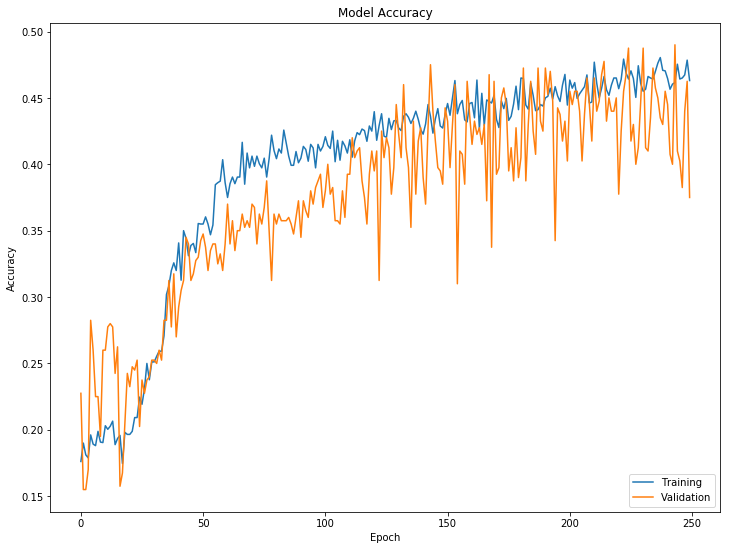

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 9))
plt.plot(hist3.history["acc"])
plt.plot(hist3.history['val_acc'])
#plt.xlim([5,50])
#plt.ylim([0.75,0.94])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Training", "Validation"], loc="lower right")
plt.show()

The high dropout was too much, and the network is not able to capture the required information to accurately predict the category.

The best accuracy we achieved was 0.74, which is not too bad considering the relatively small data set and the inability to change the convolution layers, however I do not think changing the convolution layers will help much.

To improve this further, I would tweak the dropout and regularization parameters more, however, on my hardware this model takes a long time to train.

I think using some data augmentation would also be very useful, since the data set size is also a problem, and we might be able to "create" some data that way.